In [20]:
import pickle
from feature_extractor import FeatureExtractor
from sklearn.neighbors import NearestNeighbors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [21]:
filenames = pickle.load(open('data/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('data/features-caltech101-resnet.pickle', 'rb'))

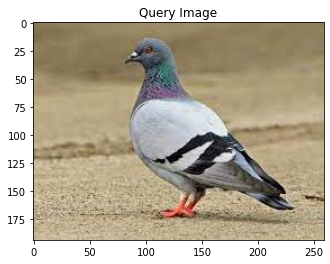

In [30]:
img = mpimg.imread('query-4.jpg')
plt.title('Query Image')
plt.imshow(img)
plt.show()

In [31]:
query_features = FeatureExtractor.extract('query-4.jpg')

In [32]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([query_features])

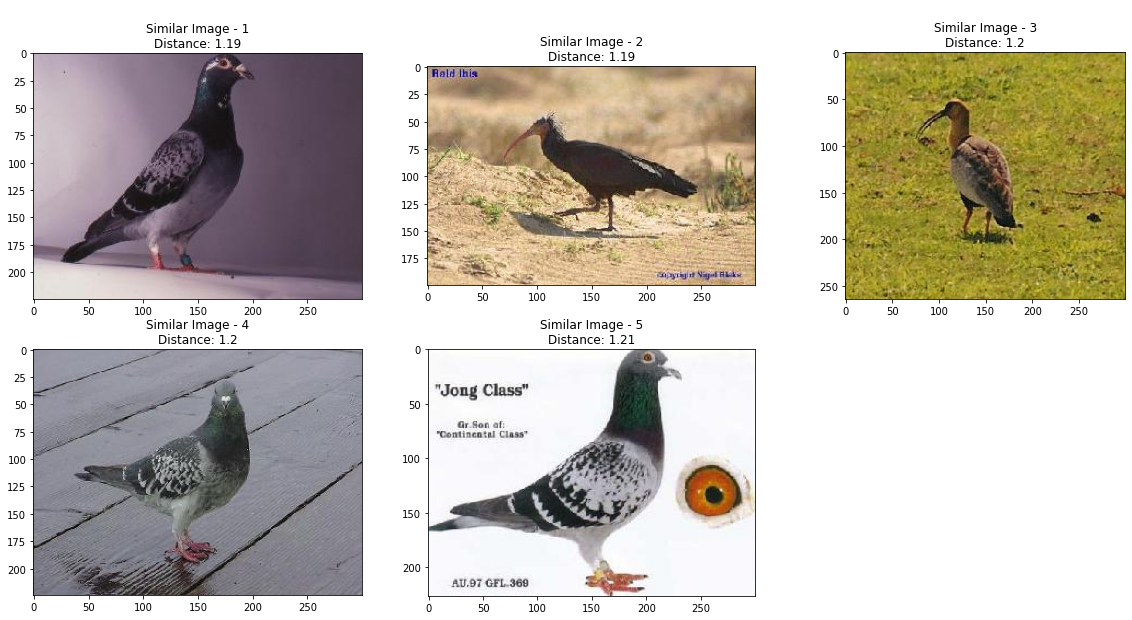

In [33]:
search_results = []
for i in range(0,5):
    filePath = filenames[indices[0][i]]
    img = mpimg.imread(filePath)
    search_results.append(img)
    
    
plt.figure(figsize=(20, 10))
columns = 3
for i, image in enumerate(search_results):
    ax = plt.subplot(2, columns, i + 1)
    ax.set_title("\nSimilar Image - " + str(i + 1) +"\nDistance: "+str(float("{0:.2f}".format(distances[0][i]))))
    plt.imshow(image)
